<a href="https://colab.research.google.com/github/nesaitfirullail/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Praktikum

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

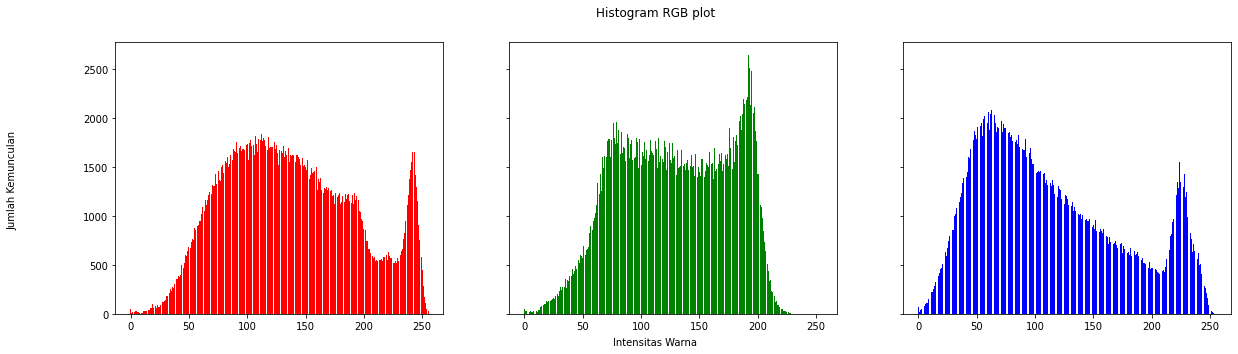

In [73]:
img = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/mandrill.tiff')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


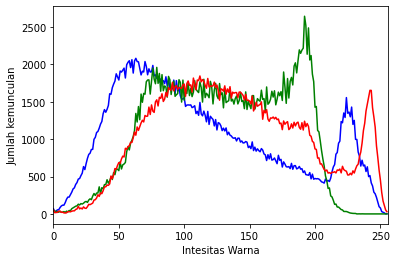

In [74]:
colors = ("b","g","r")
channel = (0,1,2)

plt.xlim([0, 256]) #xlim batas sumbu x
for channel, c in zip(channel, colors):
  histogram, edges = np.histogram(
      img[:,:, channel], bins=256, range=(0, 256)
  )
  plt.plot(edges[0:-1], histogram, color=c)

plt.xlabel("Intesitas Warna")
plt.ylabel("Jumlah kemunculan")
plt.show()

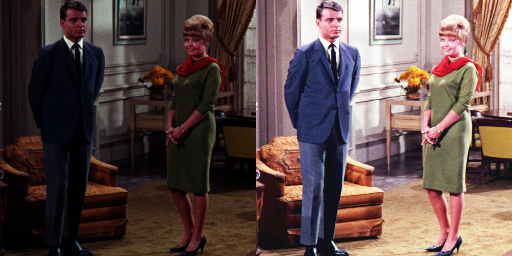

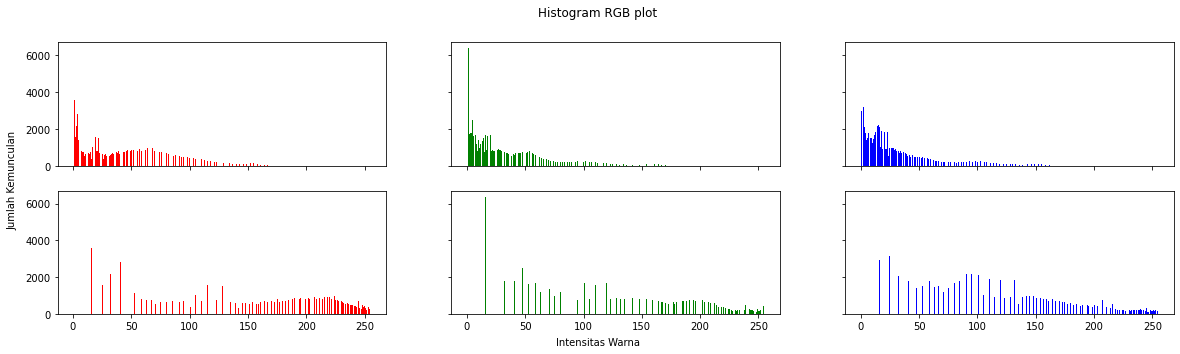

In [75]:
img1 = cv2.imread('/content/drive/MyDrive/PCVK_Genap/Images/couple.tiff')
def histog(img1):
  height, width, depth = np.shape(img1) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1 
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1 
  return ax

histo_asli = histog(img1)

img_array = np.asarray(img1)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')
     

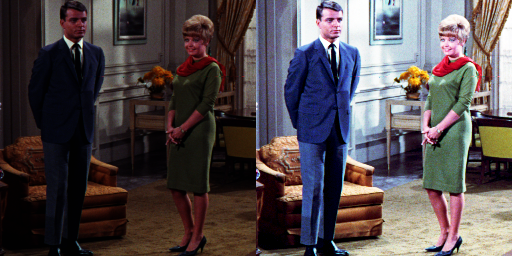

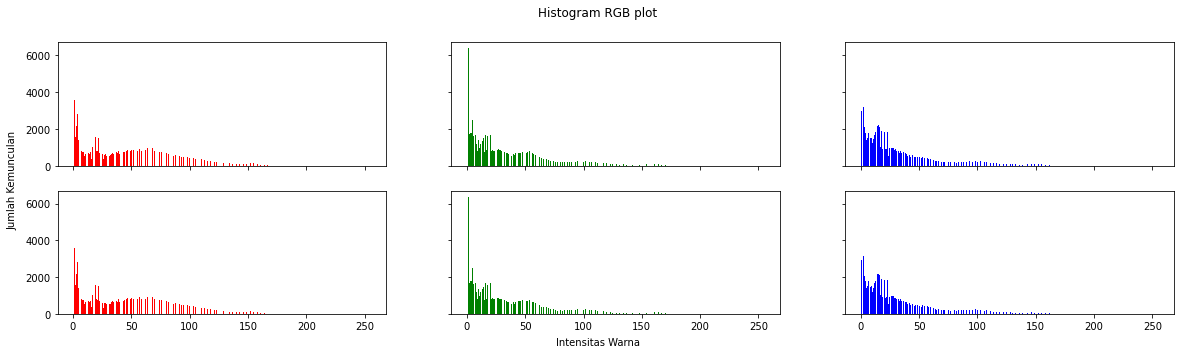

In [76]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

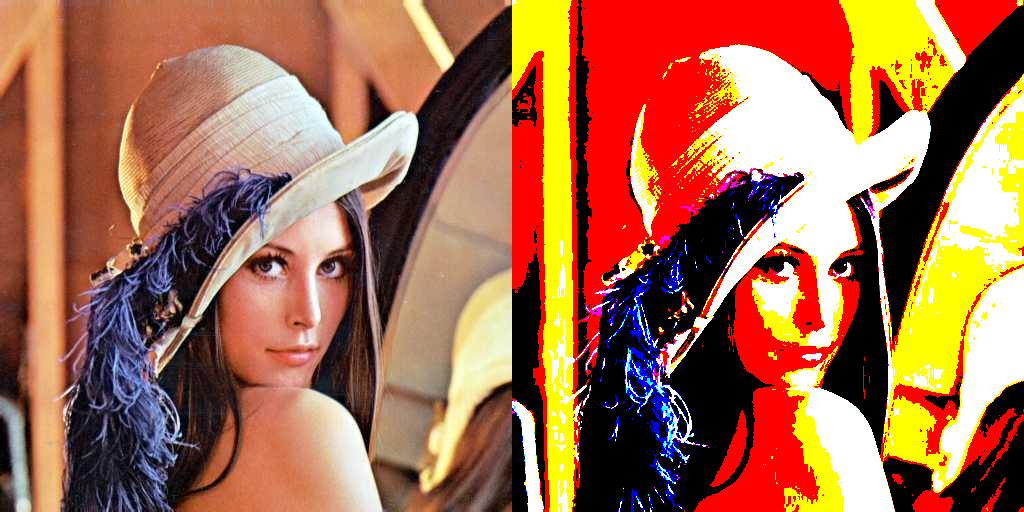

True

In [84]:
img_l = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/lena.jpg')
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_l, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK_Genap/Images/test_lena.jpg', img_8)

2.27 s ± 611 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([[1., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

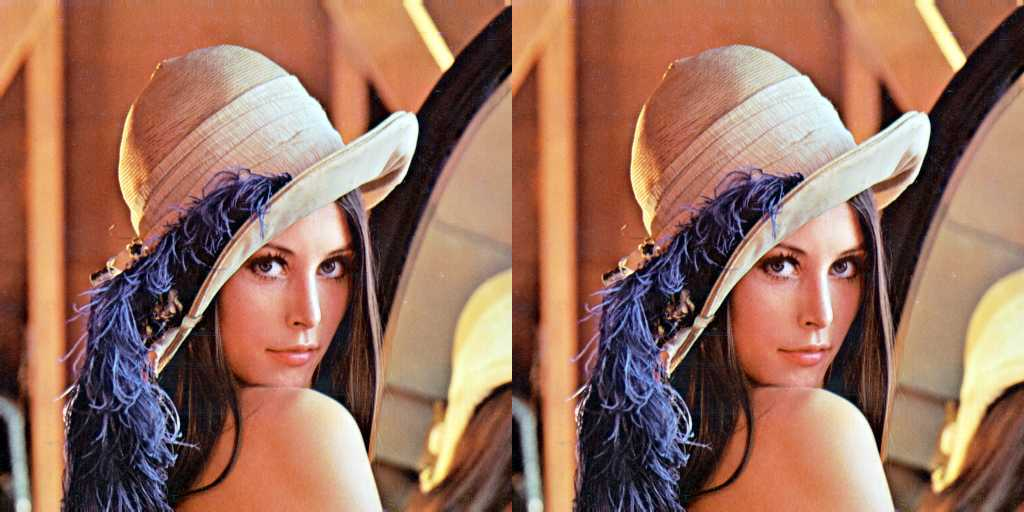

In [104]:
from PIL import Image

GREYSCALE = False
image = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/lena.jpg')

def floyd_steinberg(image):
    # image: np.array of shape (height, width), dtype=float, 0.0-1.0
    # works in-place!
    h, w = image.shape
    for y in range(h):
        for x in range(w):
            old = image[y, x]
            new = np.round(old)
            image[y, x] = new
            error = old - new
            # precomputing the constants helps
            if x + 1 < w:
                image[y, x + 1] += error * 0.4375 # right, 7 / 16
            if (y + 1 < h) and (x + 1 < w):
                image[y + 1, x + 1] += error * 0.0625 # right, down, 1 / 16
            if y + 1 < h:
                image[y + 1, x] += error * 0.3125 # down, 5 / 16
            if (x - 1 >= 0) and (y + 1 < h): 
                image[y + 1, x - 1] += error * 0.1875 # left, down, 3 / 16
    return image

# example usage - in a Jupyter notebook
from PIL import Image

def pil_to_np(pilimage):
    return np.array(pilimage) / 255

def np_to_pil(image):
    return Image.fromarray((image * 255).astype('uint8'))

img_statue = Image.open('/content/drive/MyDrive/PCVK_Genap/Images/lena.jpg').convert('L')
img_statue_array = pil_to_np(img_statue)

# eg. ~ 0.5 ms / image via Numba, ~ 770 ms / image plain Pyhton (on an older MacBook)
%timeit floyd_steinberg(img_statue_array)

display(floyd_steinberg(img_statue_array))
final_frame = cv.hconcat((image, image))
cv2_imshow(final_frame)